##import library

In [74]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
def_color=sb.color_palette()[0]


In [75]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

# styling
%matplotlib inline
#sb.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
#matplotlib.rcParams['figure.facecolor'] = '#00000000'
#matplotlib.rcParams['font.size'] = 10
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud



<a id="3"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">3. Read and Explore Dataset 🧾 </div> 

In [76]:
#Read data

Manhattan_df= pd.read_csv("/content/Manhattan_final.csv")
Brooklyn_df = pd.read_csv("/content/moderate_final.csv")
Bronx_df = pd.read_csv("/content/Bronx_final.csv")
Queens_df = pd.read_csv("/content/Queens_final.csv")
Staten_Island_df = pd.read_csv("/content/Staten_Island_final.csv")

In [77]:
airbnb_df=pd.concat([Manhattan_df,Brooklyn_df, Bronx_df, Queens_df, Staten_Island_df])


##EDA

###heatmap

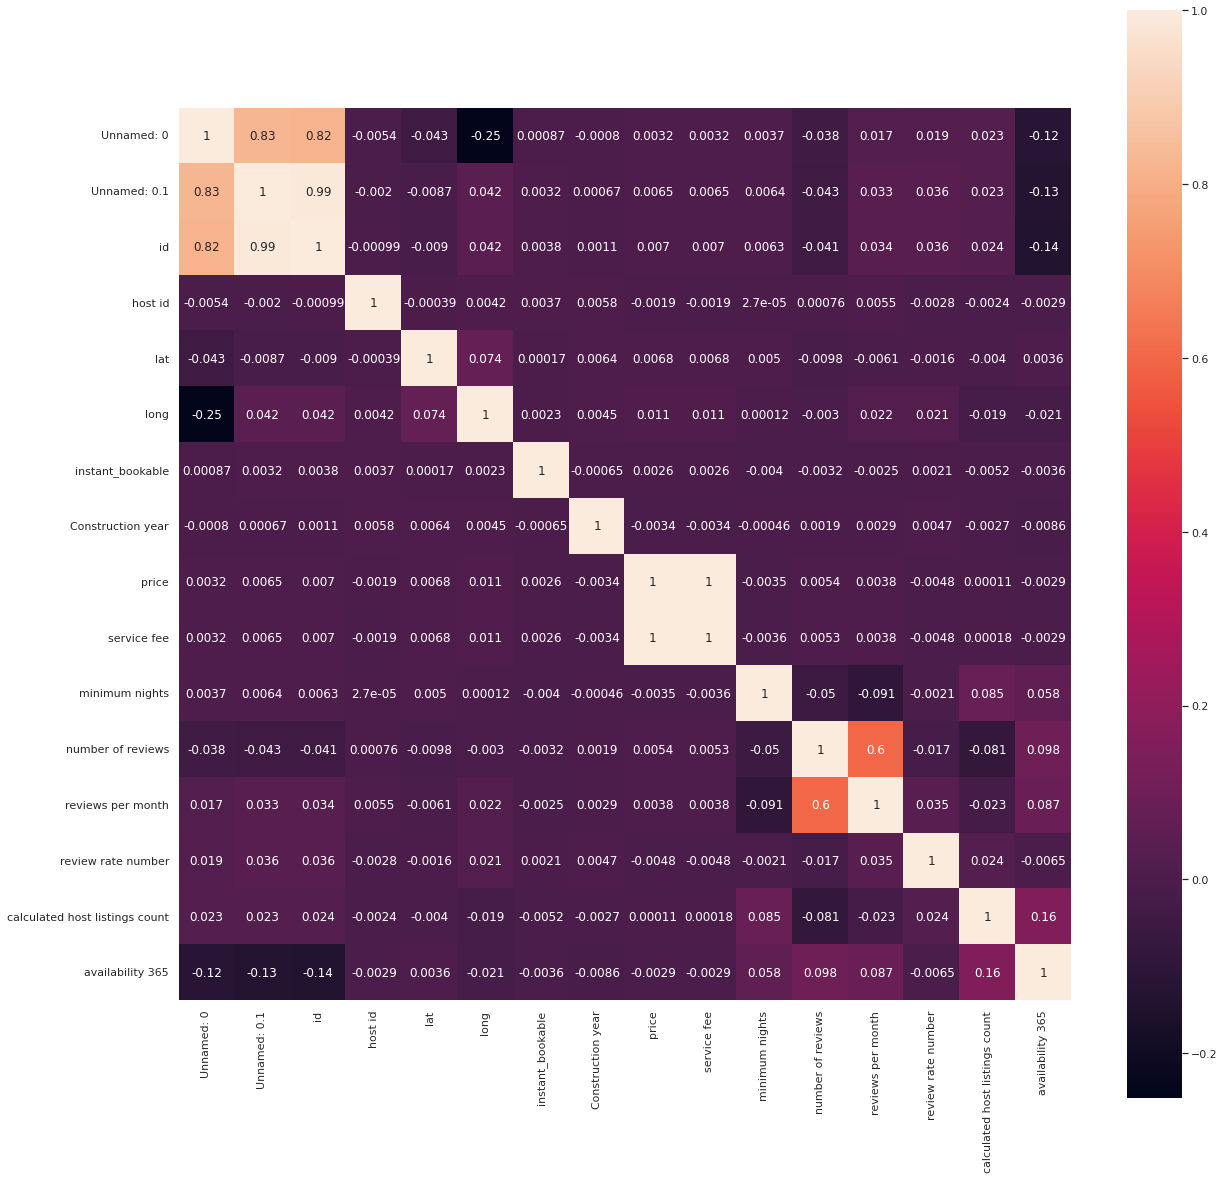

In [78]:
sns.set(rc={"figure.figsize":(20, 20)})
sns.heatmap(airbnb_df.corr(), annot=True, square=True)

# Univariate Exploration

### 1.) Construction year

### 2.) Price 

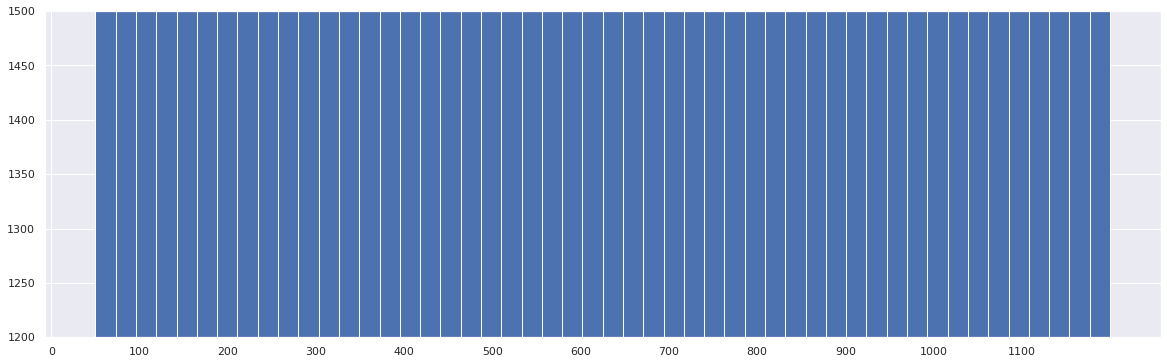

In [79]:
bins = np.arange(0,1200,100)
plt.figure(figsize=(20,6))
plt.hist(data=airbnb_df,x='price', bins=50)
plt.xticks(bins)
plt.ylim(1200,1500);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



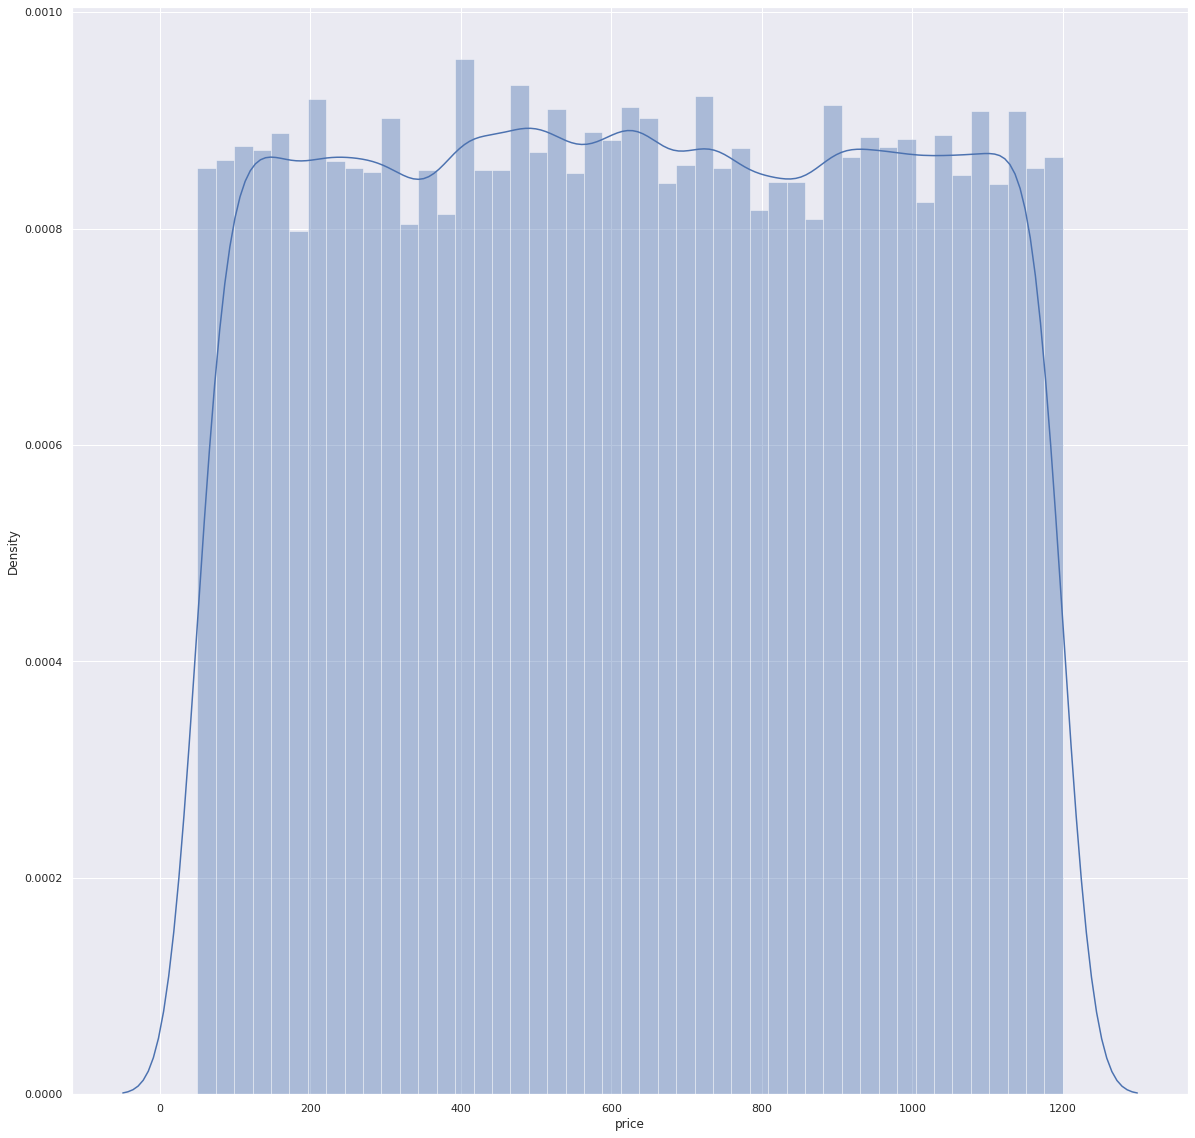

In [80]:
sb.distplot(airbnb_df.price,hist=True)

In [81]:
airbnb_df.iloc[:,10:20][airbnb_df.price==0]

,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights


### 3.) Reviews

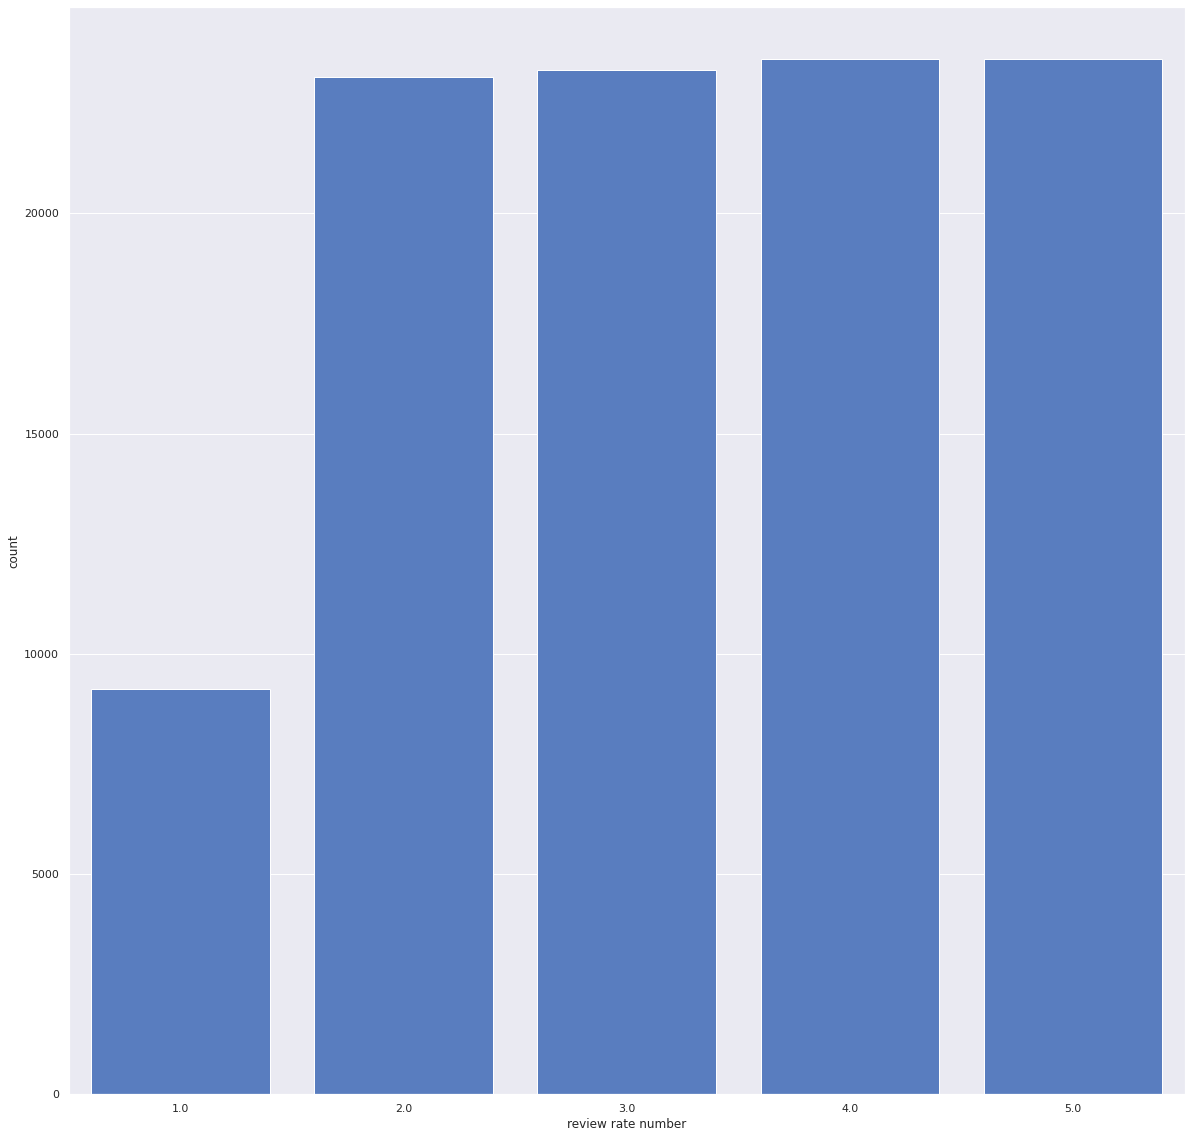

In [82]:
sb.countplot(data=airbnb_df,x='review rate number', color=def_color)

(0.5, 5.0)

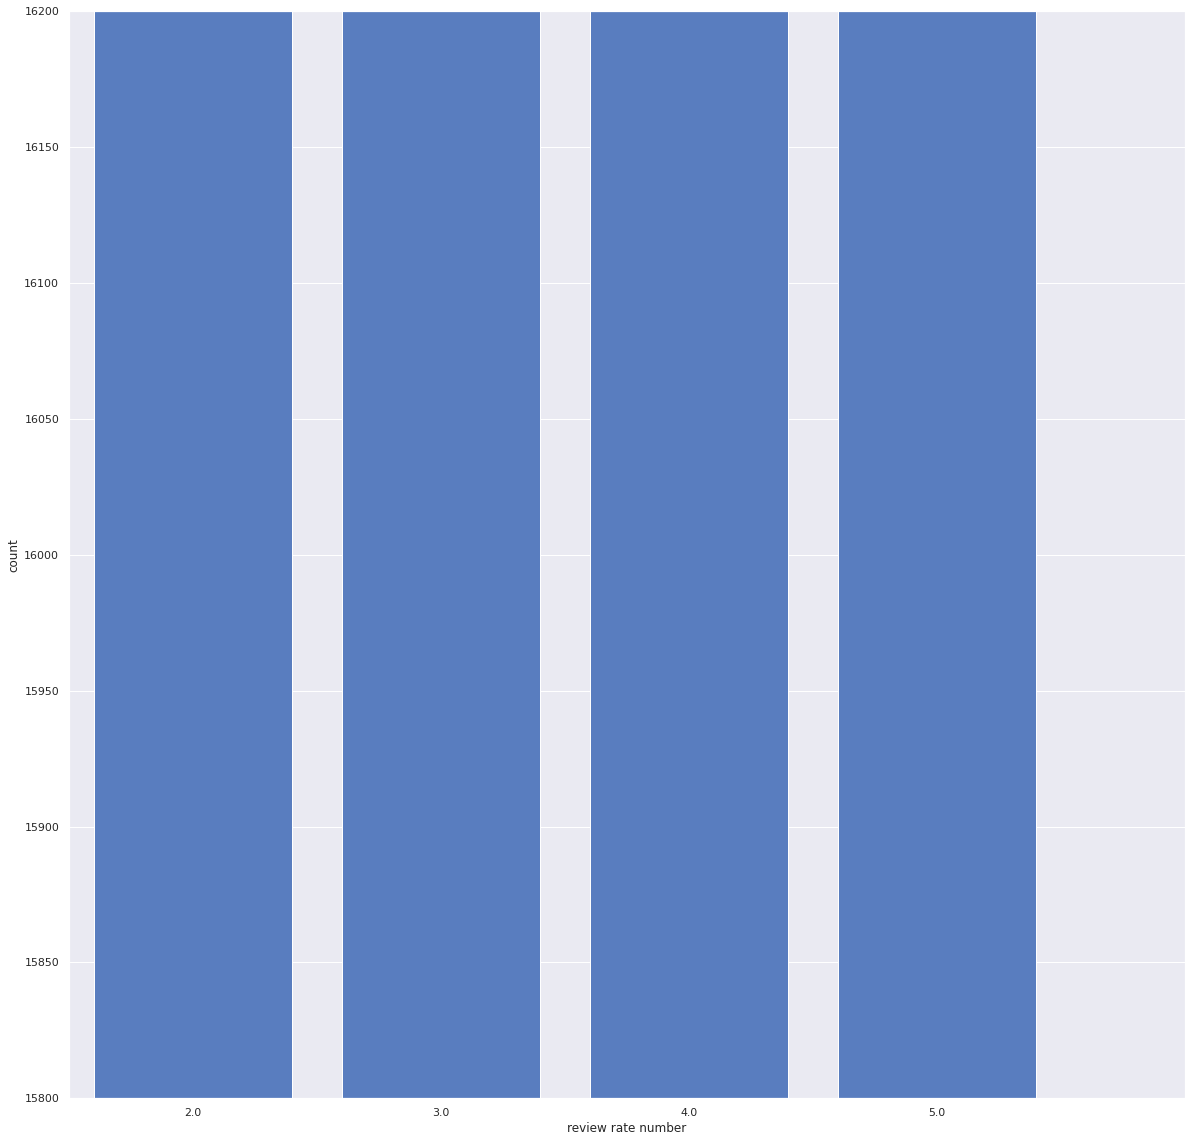

In [83]:
sb.countplot(data=airbnb_df, x='review rate number',color=def_color)
plt.ylim(15800,16200)
plt.xlim(.5,5)

In [84]:
airbnb_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'NAME', 'host id',
       'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

### 4.) Room Type

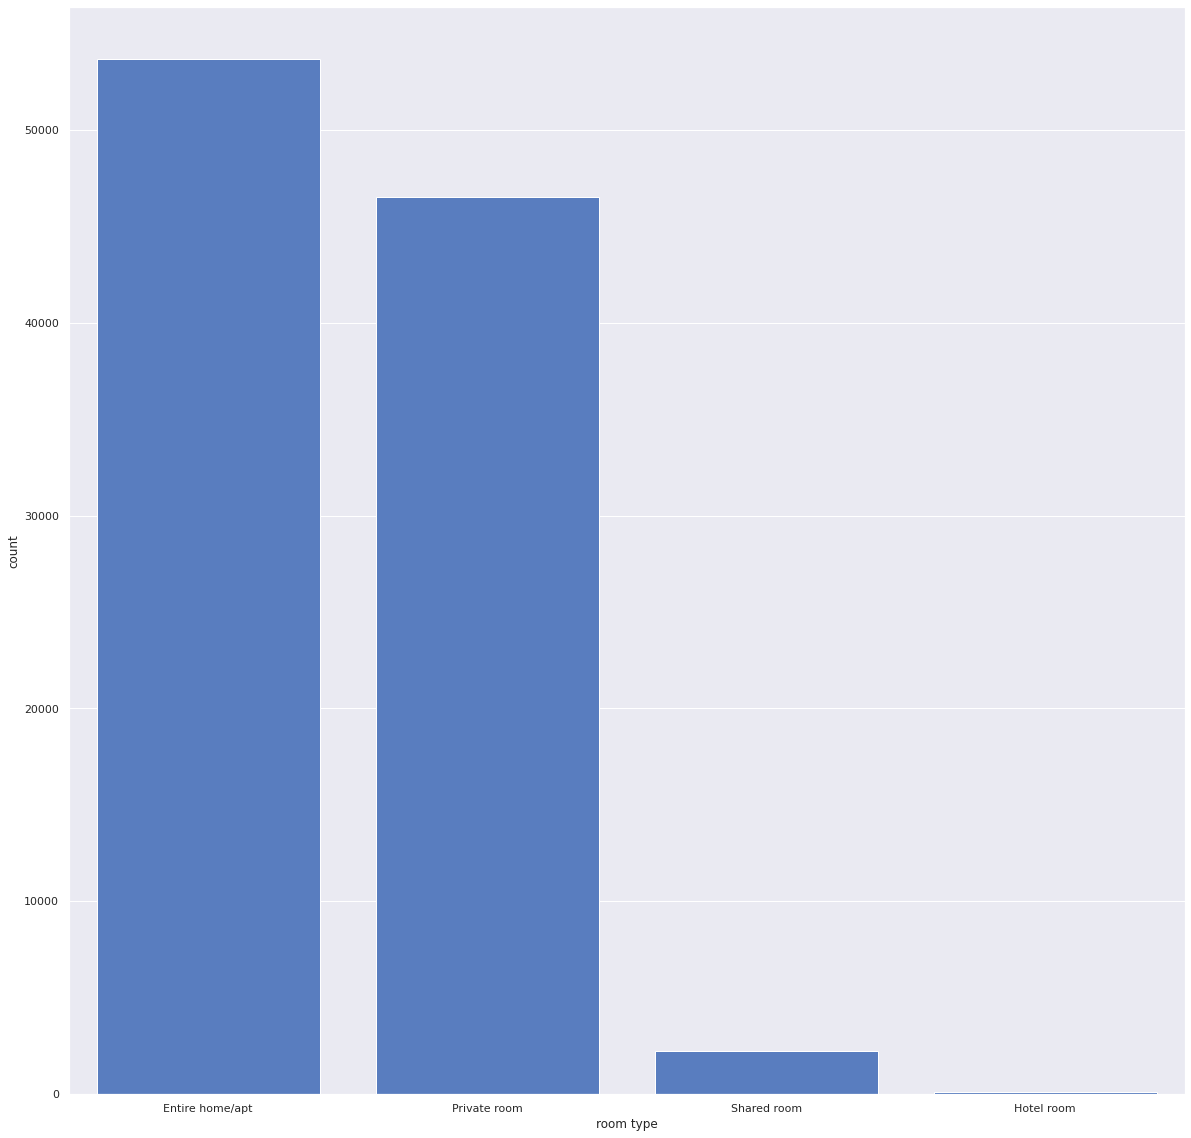

In [85]:
sb.countplot(data=airbnb_df,x='room type', color=def_color)

### 5.) Number of Reviews

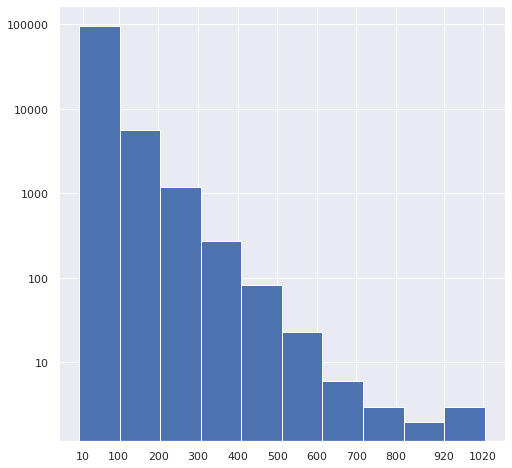

In [86]:
plt.figure(figsize=(8,8))
plt.hist(data=airbnb_df,x='number of reviews',bins=10)
plt.yscale('log')
plt.xticks([10,100,200,300,400,500,600,700,800,920,1020])
plt.yticks([10,100,1000,10000,100000],[10,100,1000,10000,100000]);

In [87]:
airbnb_df['number of reviews'].describe()

count    102551.000000
mean         27.444823
std          49.471577
min           0.000000
25%           1.000000
50%           7.000000
75%          30.000000
max        1024.000000
Name: number of reviews, dtype: float64

### 6.) Cancellation Policy

(22500.0, 23500.0)

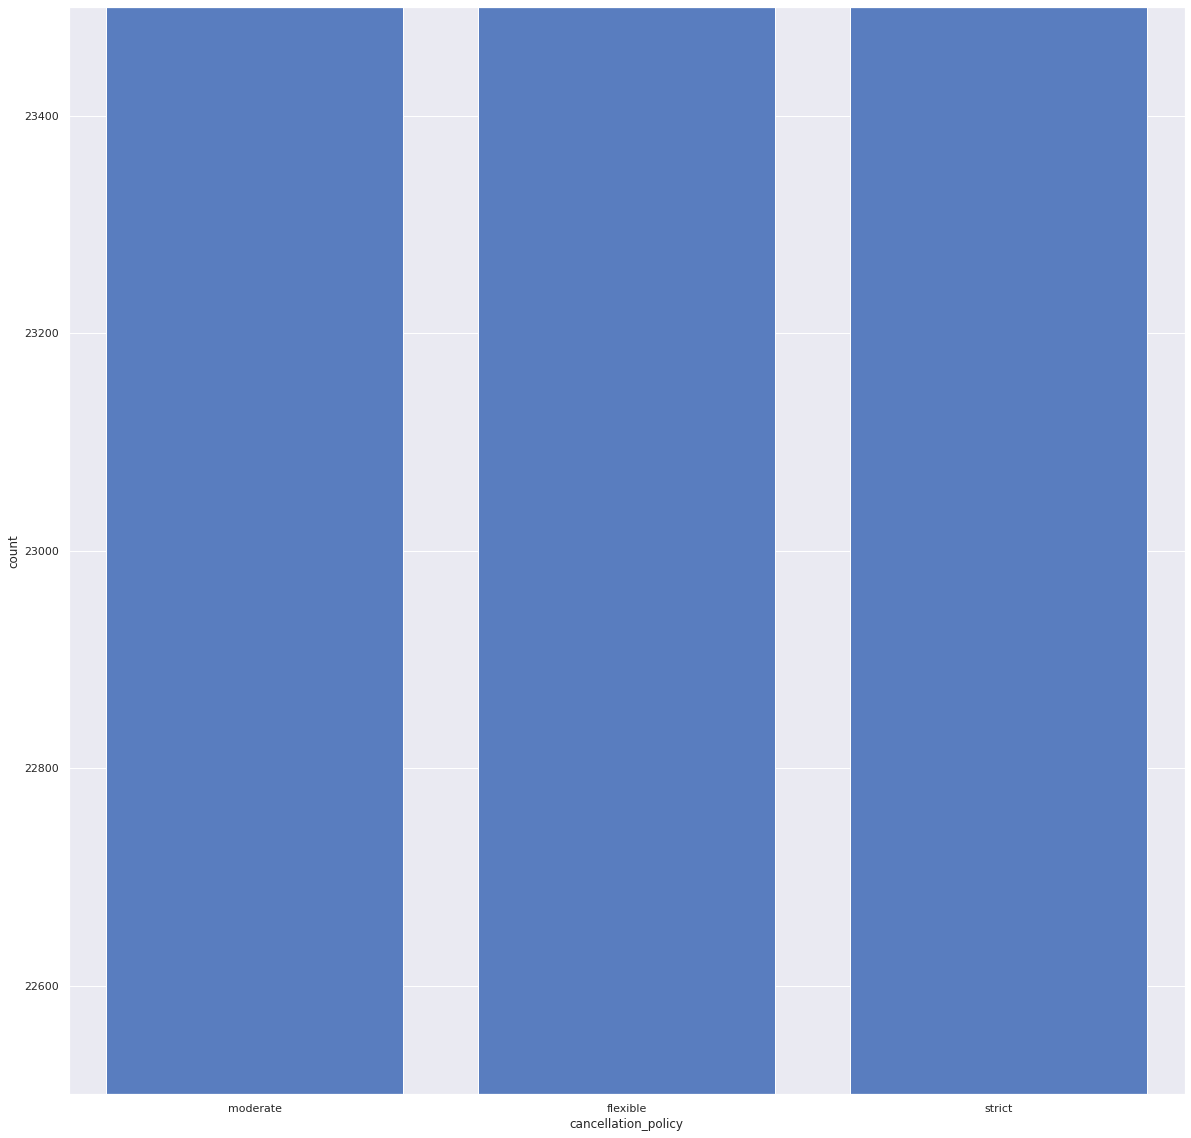

In [88]:
sb.countplot(data=airbnb_df, x='cancellation_policy', color=def_color)
plt.ylim(22500,23500)

# Bivariate Exploration

### neighbourhood group and the price ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Neighbourhood Group')

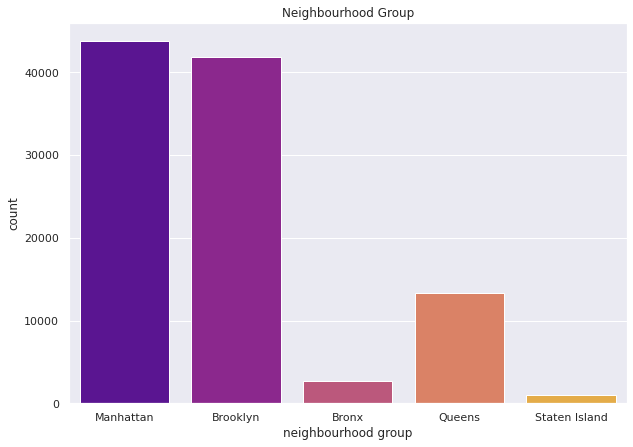

In [89]:
# Visualize the number of observation for each neighbourhood_group
sns.countplot(airbnb_df['neighbourhood group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.title('Neighbourhood Group')

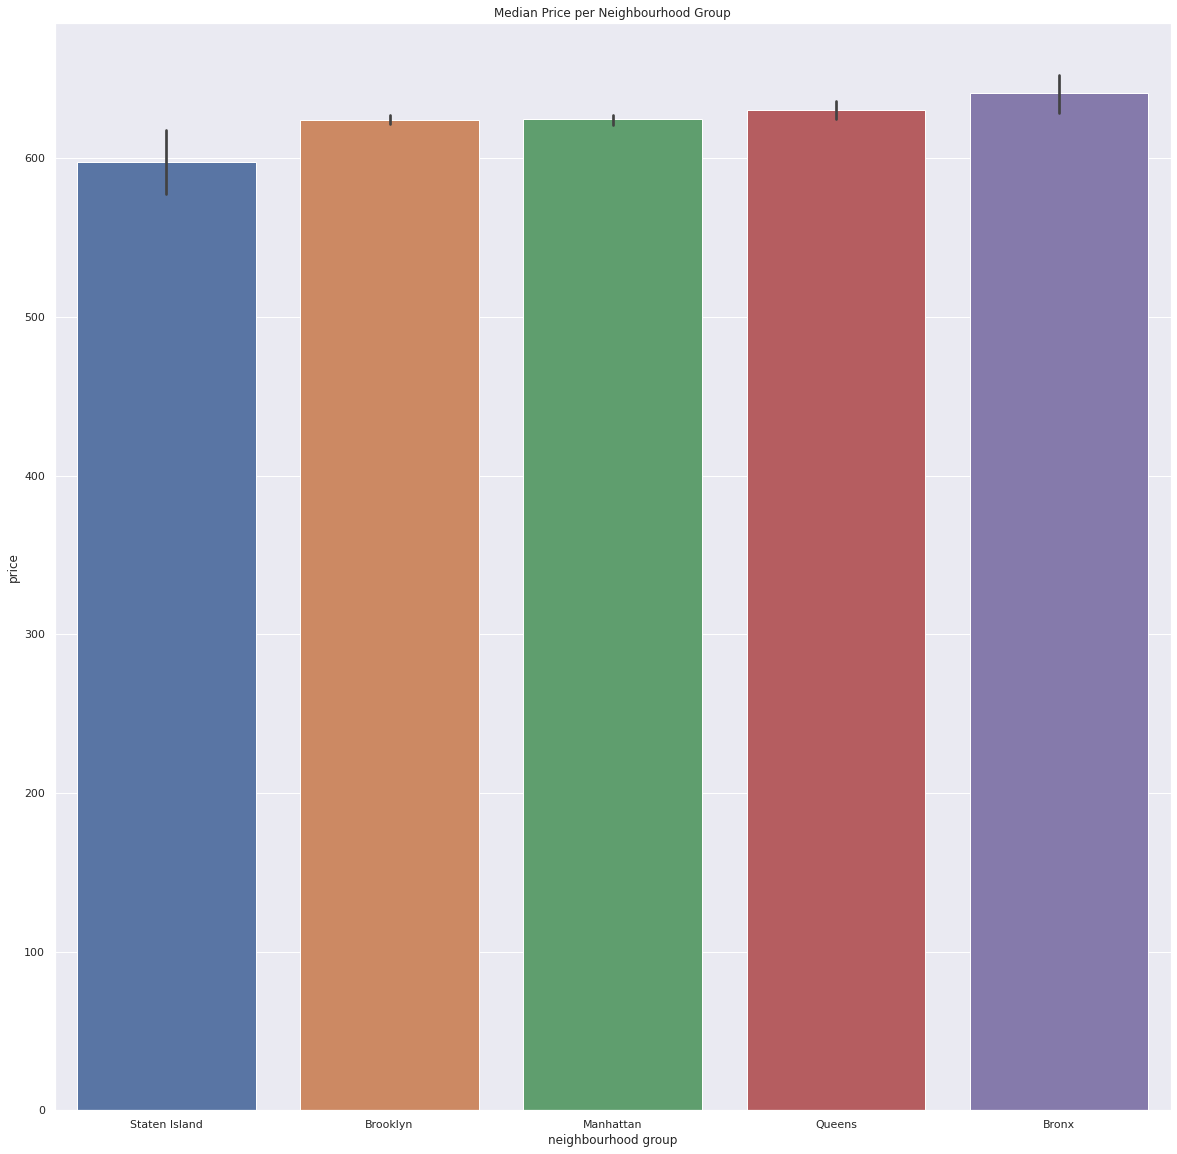

In [90]:
title = 'Median Price per Neighbourhood Group'
result = airbnb_df.groupby(["neighbourhood group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood group', y="price", data=airbnb_df, order=result['neighbourhood group'])
plt.title(title)
plt.ioff()

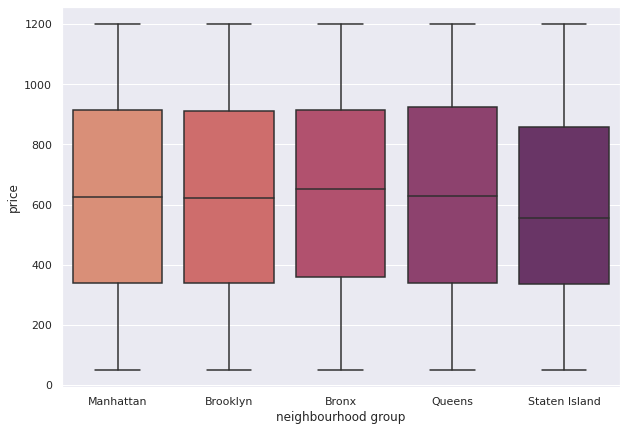

In [91]:
neighbourhood_group = airbnb_df.groupby('neighbourhood group')
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(font_scale=2)
sns.boxplot(x="neighbourhood group", y="price", data=airbnb_df,palette="flare")

###host identity and price 

### 1.) Review Rate and Price

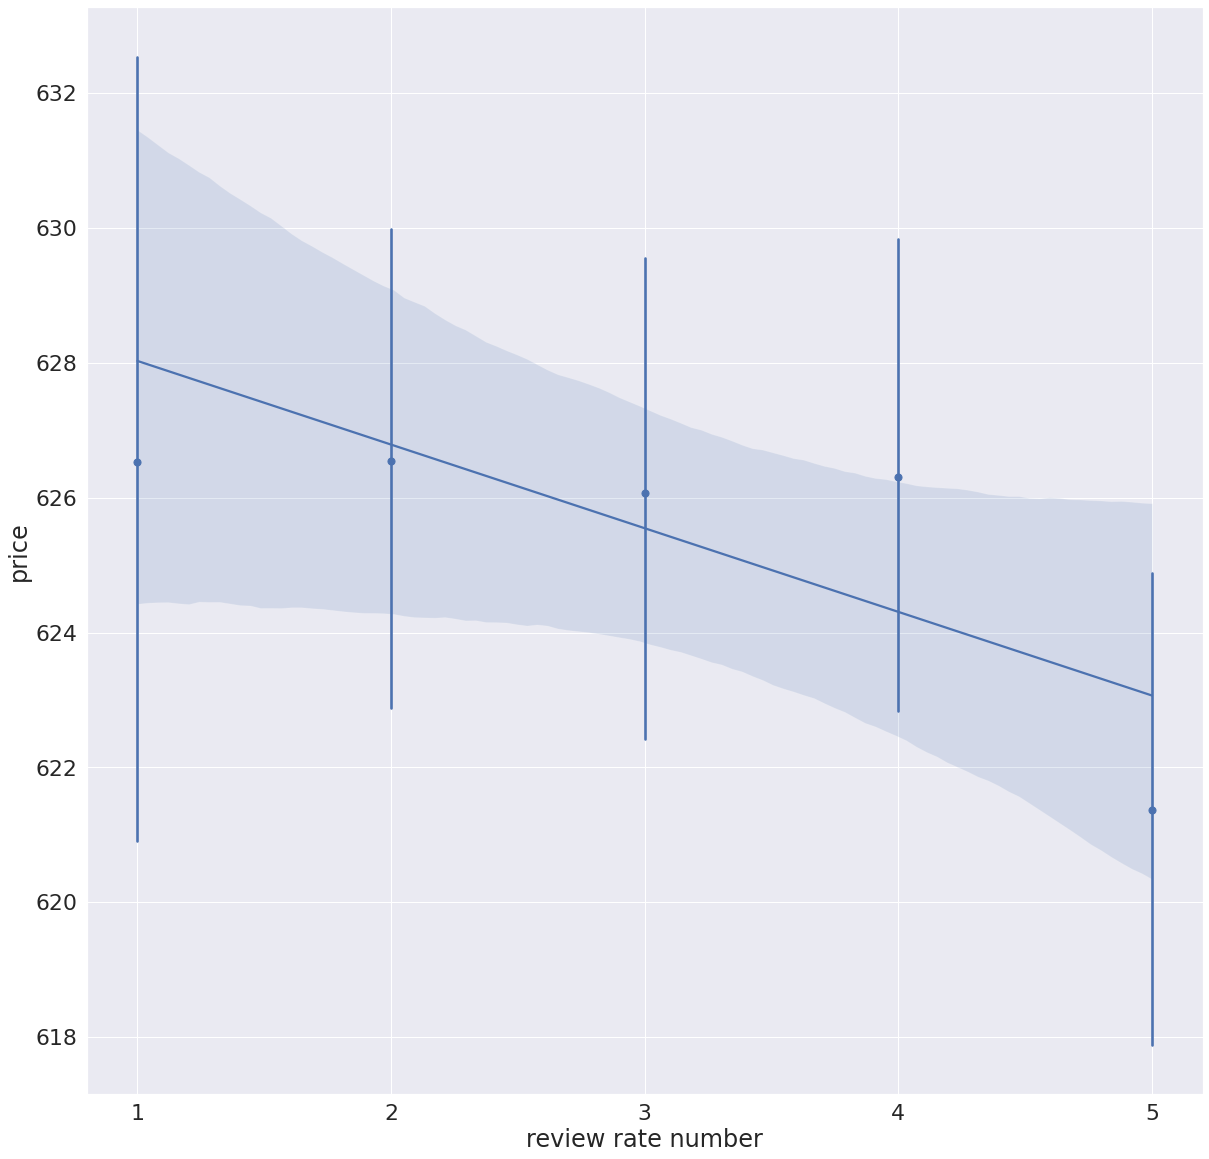

In [92]:
sb.regplot(data = airbnb_df, x='review rate number',y='price',x_jitter=.2,x_bins=[1,2,3,4,5]
          ,ci=90)
plt.xticks([1,2,3,4,5]);

### 2.)  Number of Reviews & Price

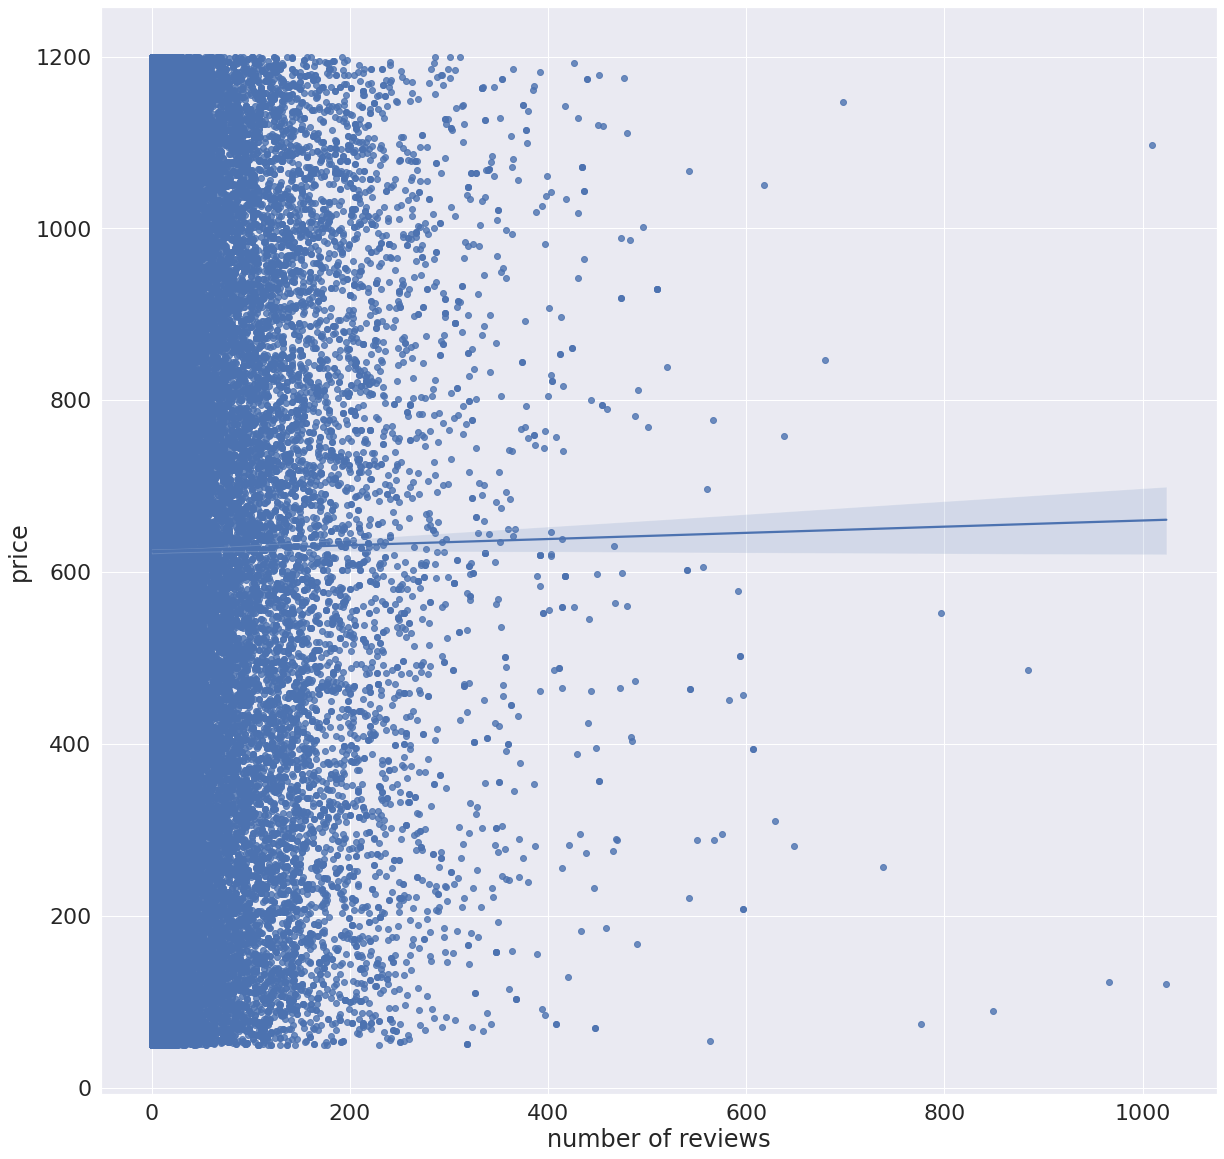

In [93]:
sb.regplot(data=airbnb_df, x='number of reviews',y='price')

In [94]:
df_cheap = airbnb_df[airbnb_df.loc[:,'price']<= 200]

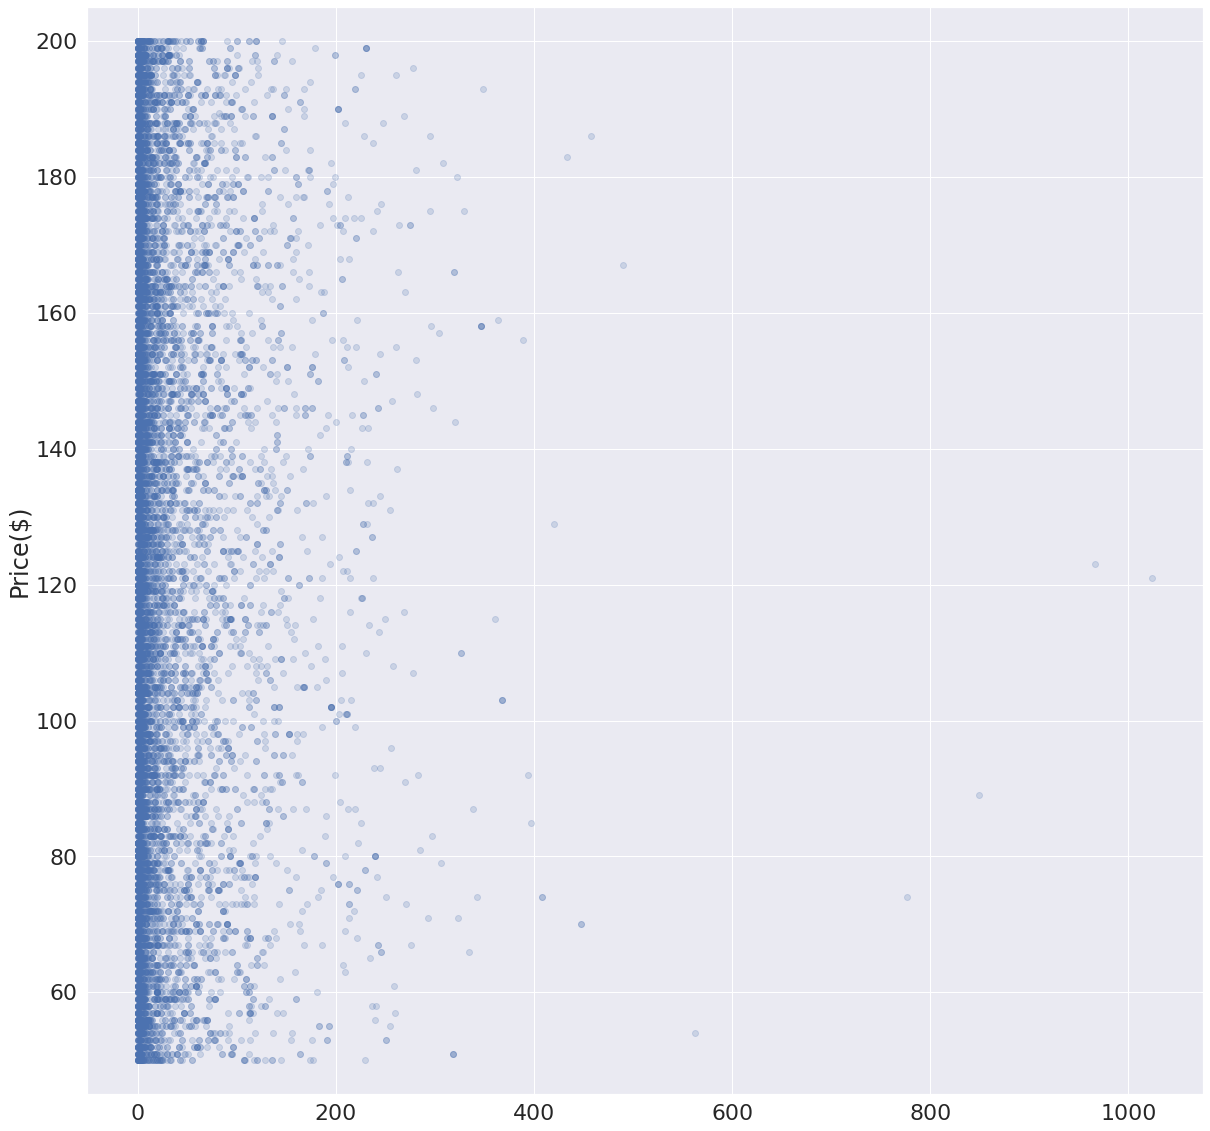

In [95]:
plt.scatter(data=df_cheap,x='number of reviews',y='price', alpha=.2)
plt.ylim(45,205)
plt.ylabel('Price($)');

In [96]:
df_mid = airbnb_df[(airbnb_df.loc[:,'price']>= 200) & (airbnb_df.loc[:,'price'] <500)]

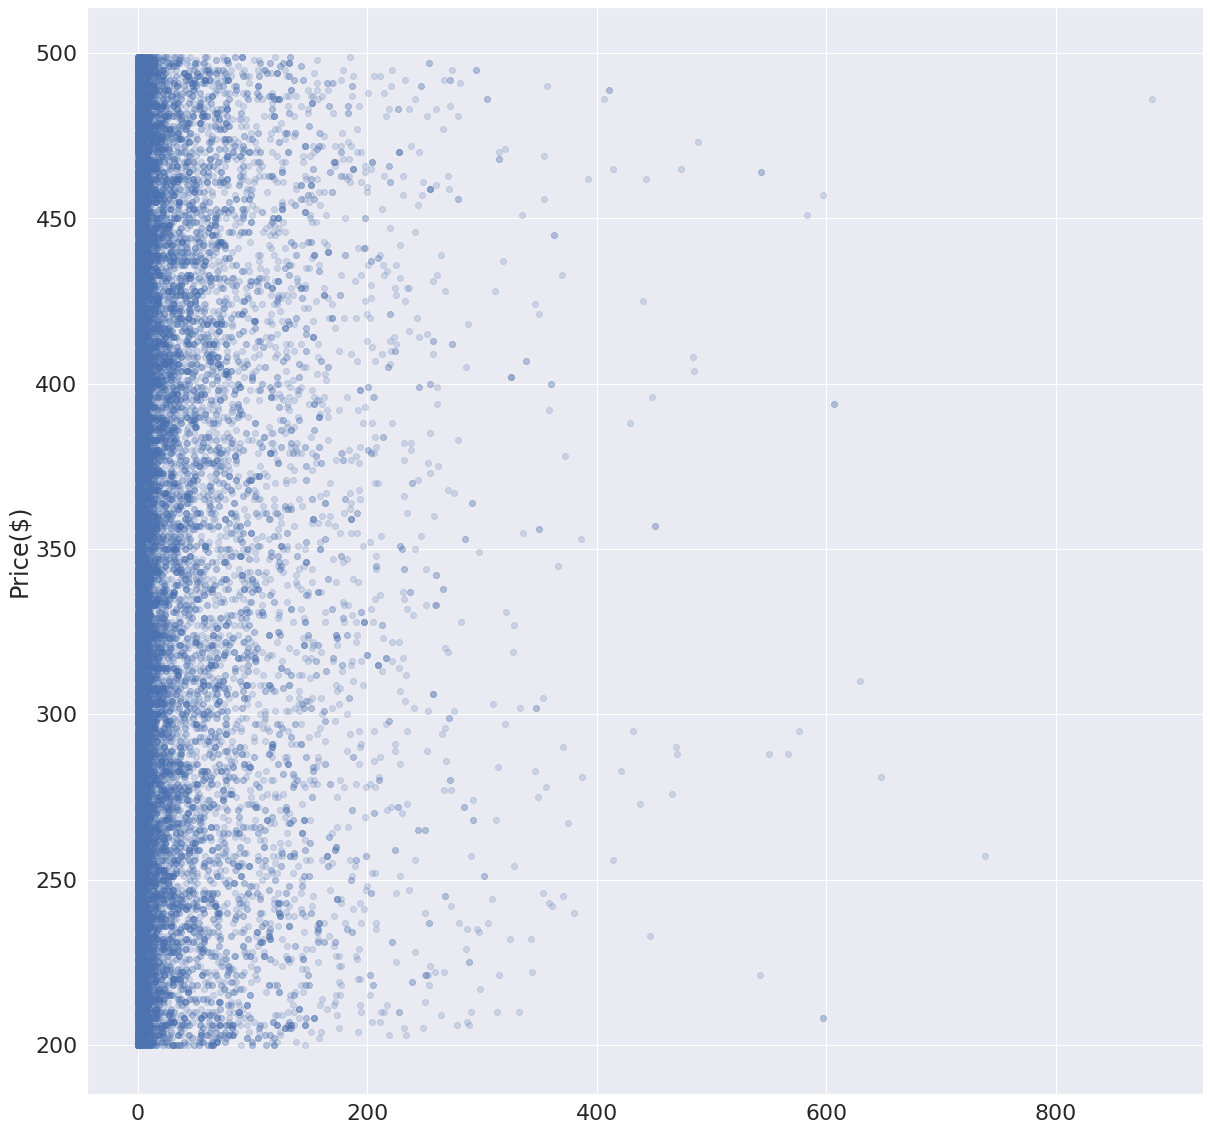

In [97]:
plt.scatter(data=df_mid,x='number of reviews',y='price',alpha=.2)
plt.ylabel('Price($)');

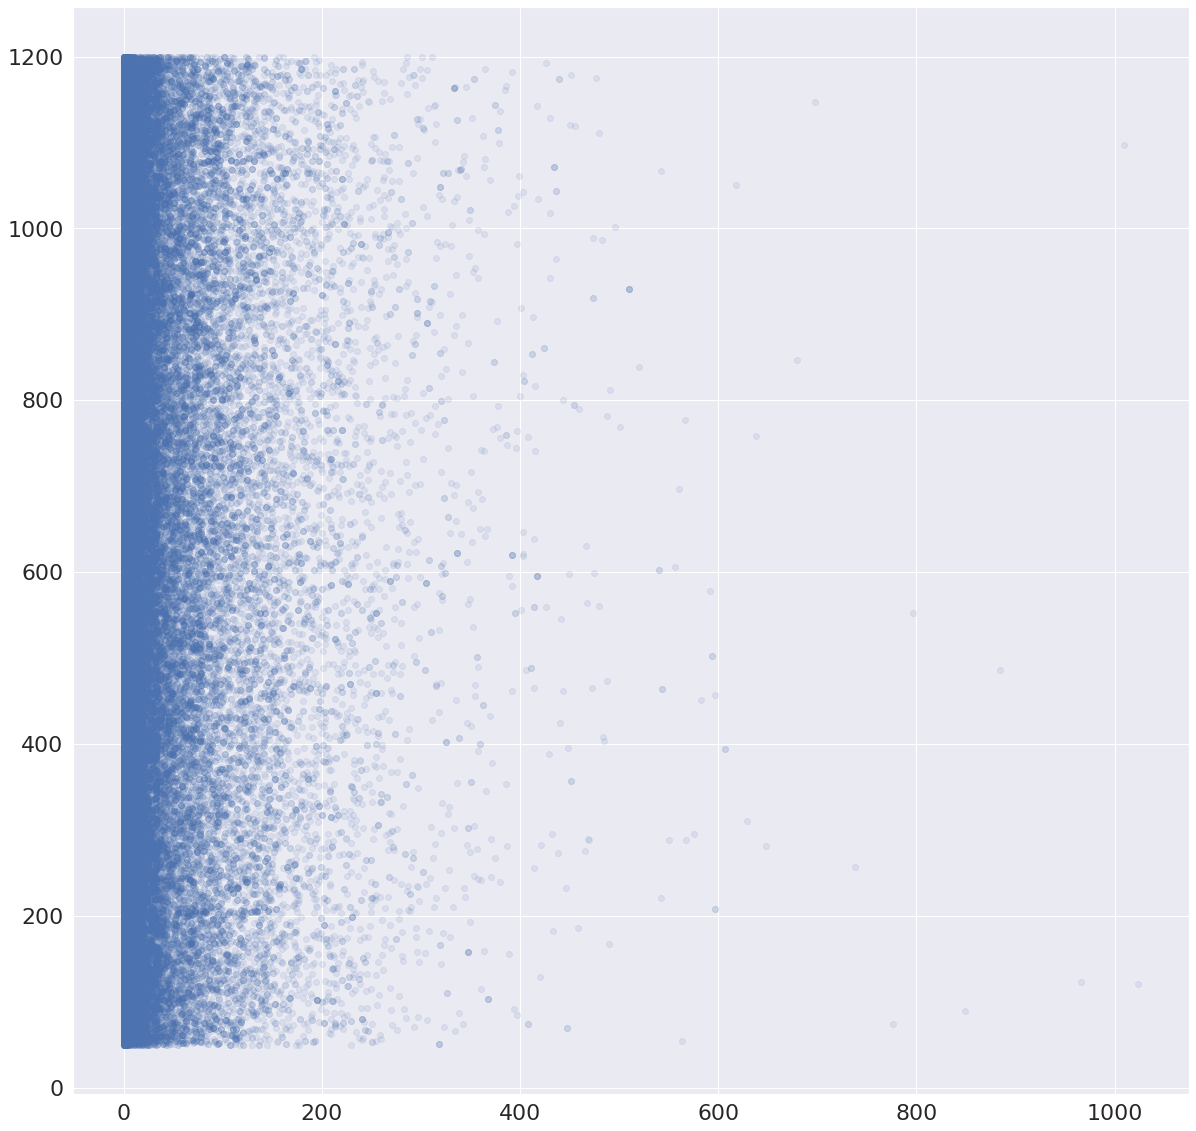

In [98]:
plt.scatter(data=airbnb_df,x='number of reviews',y='price', alpha=.1,)

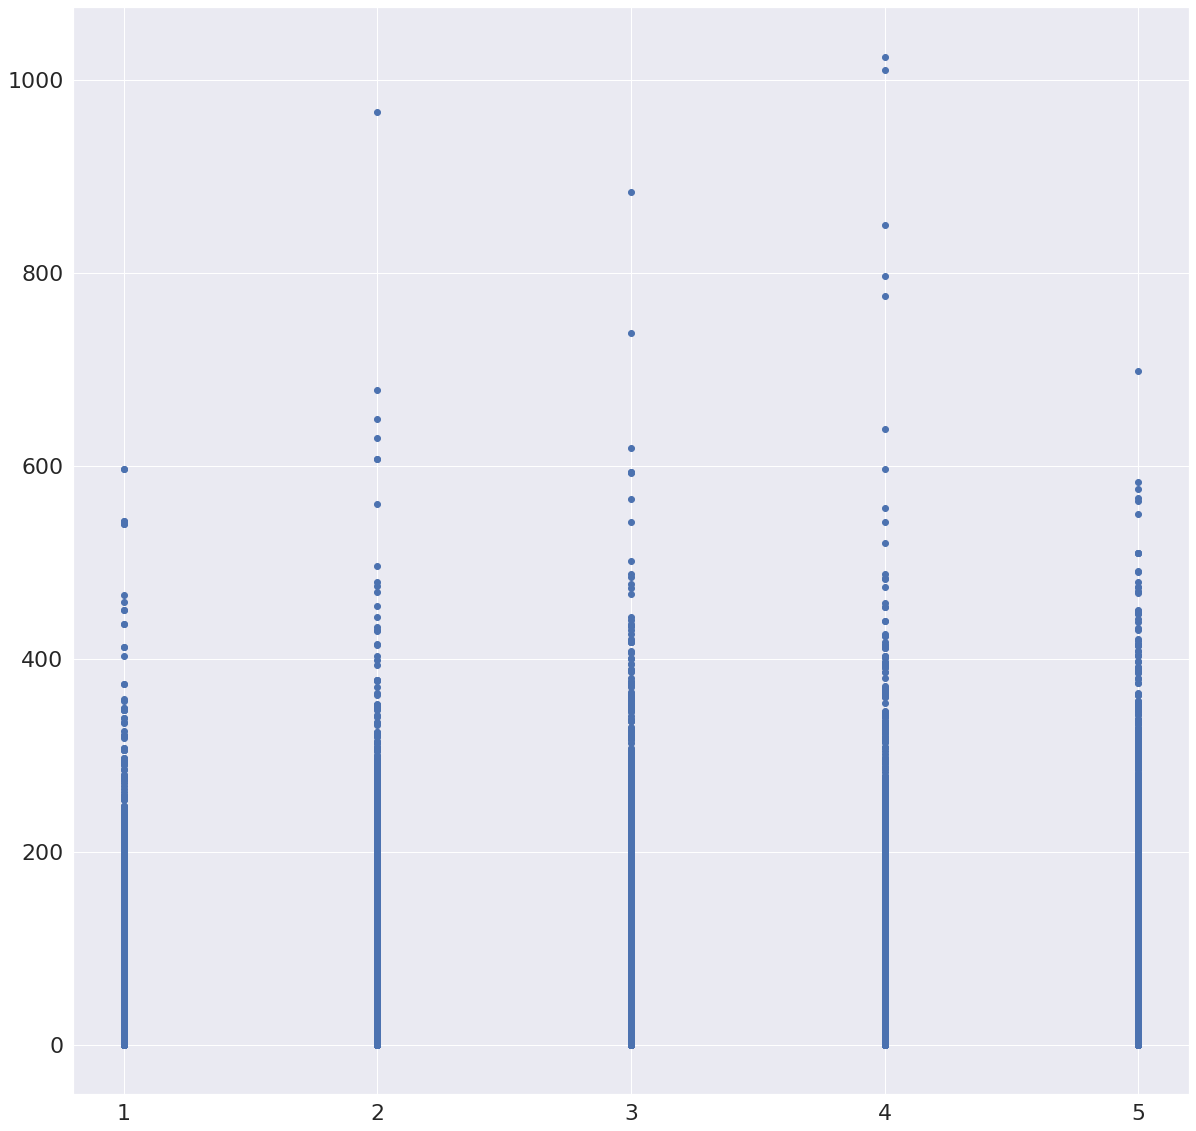

In [99]:
plt.scatter(data=airbnb_df,x='review rate number',y='number of reviews')
plt.xticks([1,2,3,4,5]);

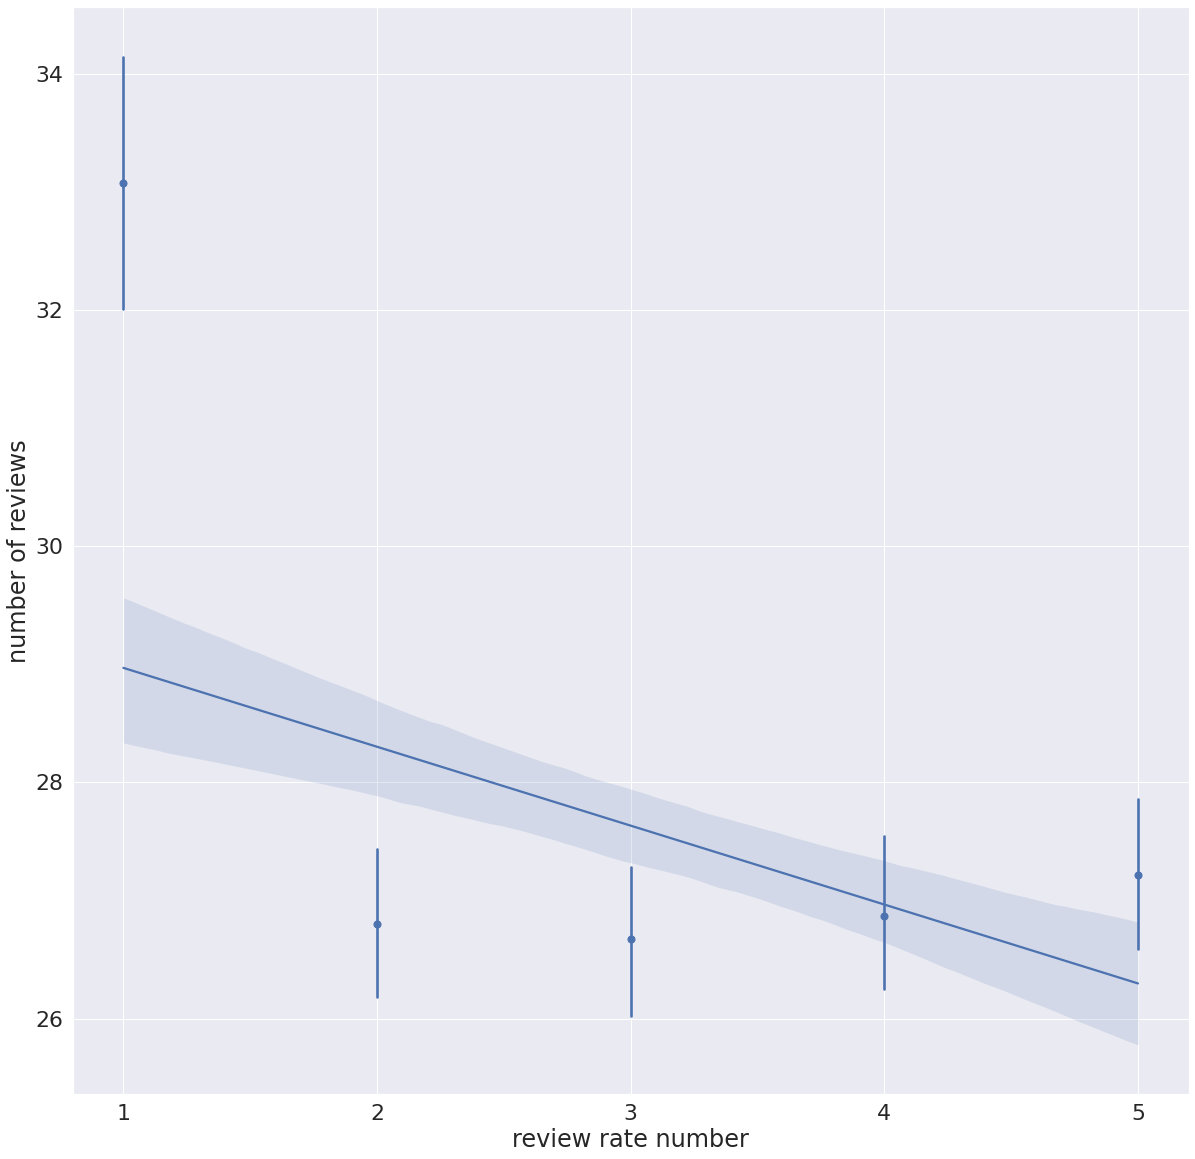

In [100]:
sb.regplot(data=airbnb_df,x='review rate number',y='number of reviews',x_bins=[1,2,3,4,5])
plt.xticks([1,2,3,4,5],[1,2,3,4,5]);

In [101]:
from scipy.stats import f_oneway


In [102]:
category_list = airbnb_df.groupby('review rate number')['price'].apply(list)
Annova_result = f_oneway(*category_list)
print('P-value for Annova is : ',Annova_result[0])

P-value for Annova is :  1.0260747393017136


### 4.) Room Type & Price

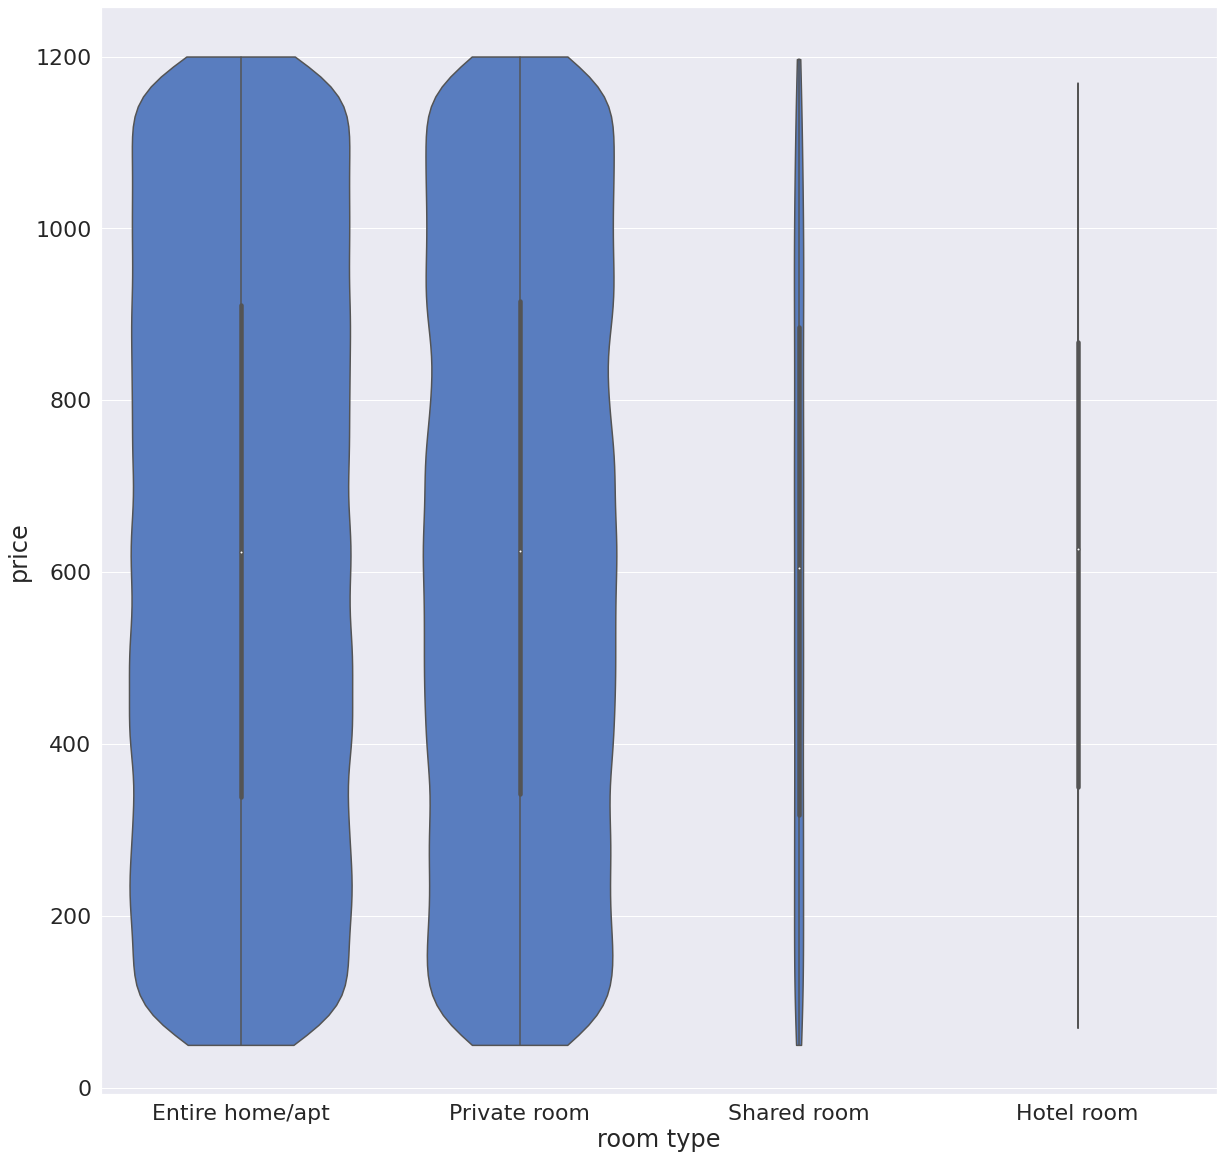

In [103]:
sb.violinplot(x='room type',y='price',data=airbnb_df, color=def_color,
             cut=0, scale='count')

(600.0, 710.0)

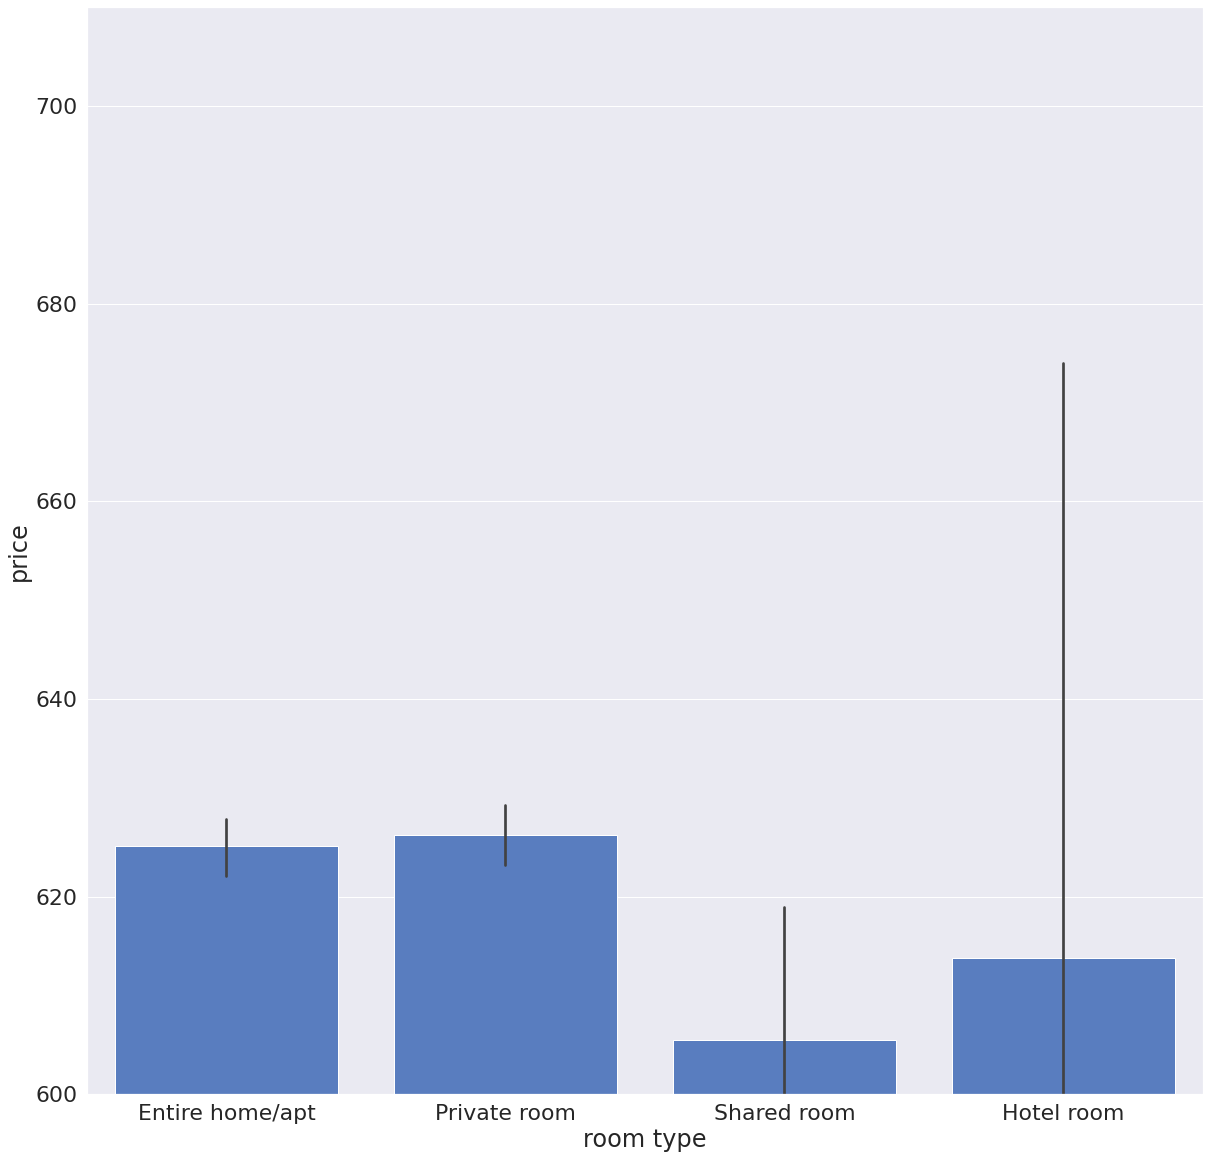

In [104]:
sb.barplot(x='room type',y='price',data=airbnb_df, color=def_color)
plt.ylim(600,710)

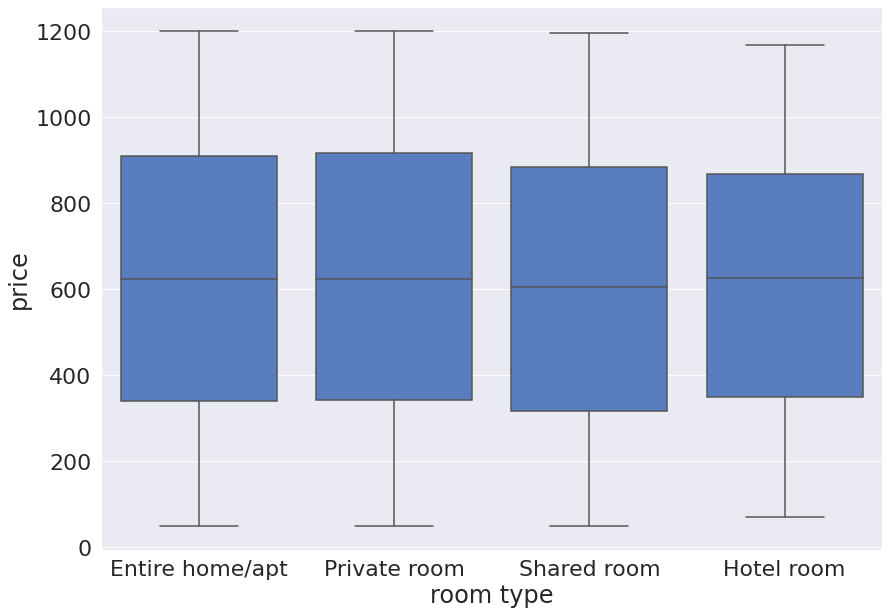

In [105]:
plt.figure(figsize=(14,10))
sb.boxplot(x='room type',y='price',data=airbnb_df, color=def_color)


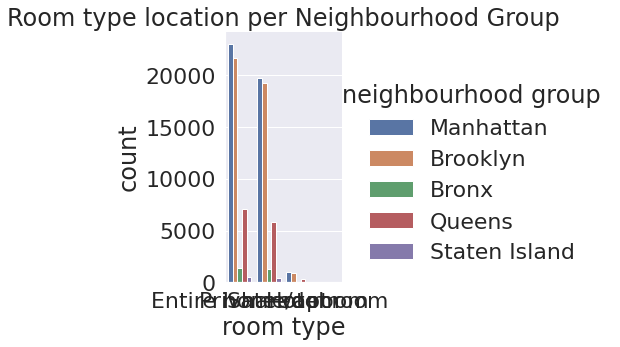

In [106]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room type', kind="count", hue="neighbourhood group", data=airbnb_df);
plt.title(title)
plt.ioff()
# Set the default text font size
#plt.rc('font', size=12)
# Set the axes title font size
#lt.rc('axes', titlesize=12)
# Set the axes labels font size
#plt.rc('axes', labelsize=12)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=8)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
# Set the legend font size
#plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=12)

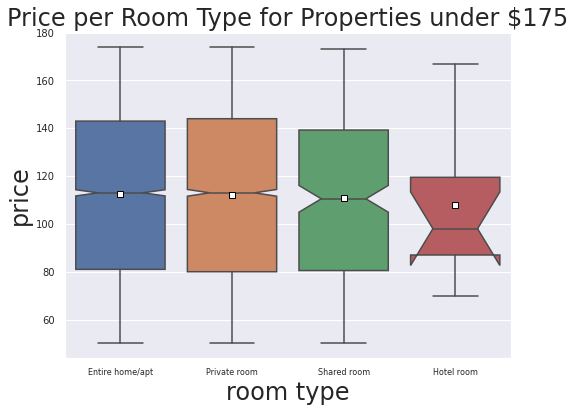

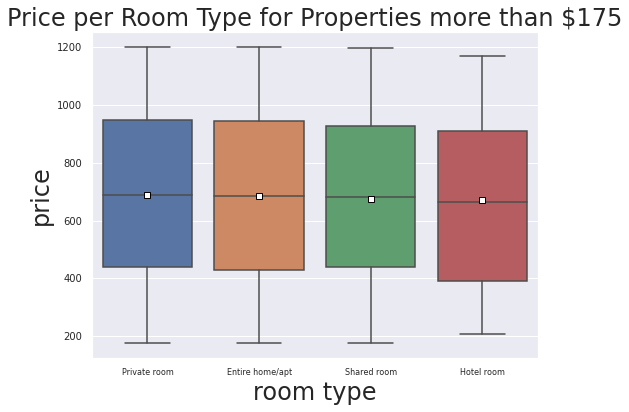

In [107]:
title = 'Price per Room Type for Properties under $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room type', y='price', data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per Room Type for Properties more than $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room type', y='price', data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()


In [108]:
for i in airbnb_df['room type'].unique():
    print(i,':', airbnb_df[airbnb_df.loc[:,'room type'] == i]['price'].mean())

Entire home/apt : 625.1211648097776
Private room : 626.2524468511833
Shared room : 605.5090337078652
Hotel room : 613.821551724138


In [109]:
airbnb_df[airbnb_df.loc[:,'room type'] == 'Private room']['price'].mean()

626.2524468511833

####Anova

In [110]:
from scipy.stats import f_oneway


In [111]:
category_list = airbnb_df.groupby('room type')['price'].apply(list)
Annova_result = f_oneway(*category_list)
print('P-value for Annova is : ',Annova_result[0])

P-value for Annova is :  2.8187497045546097


### 5.) Construction Year & Price

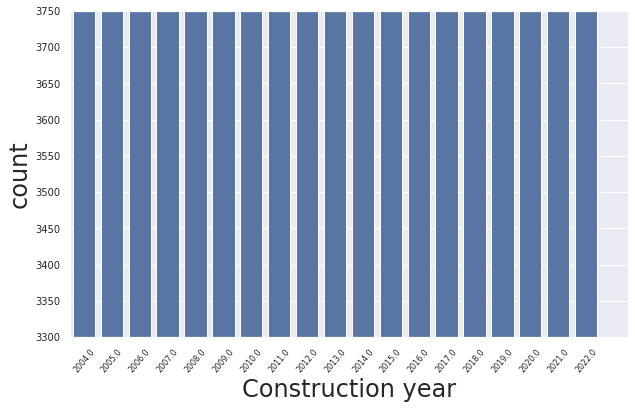

In [112]:
plt.figure(figsize=(10,6))
sb.countplot(data=airbnb_df,x='Construction year', color=sb.color_palette()[0])
plt.xticks(rotation=50)
plt.ylim(3300,3750)
plt.xlim(.5,20.5);

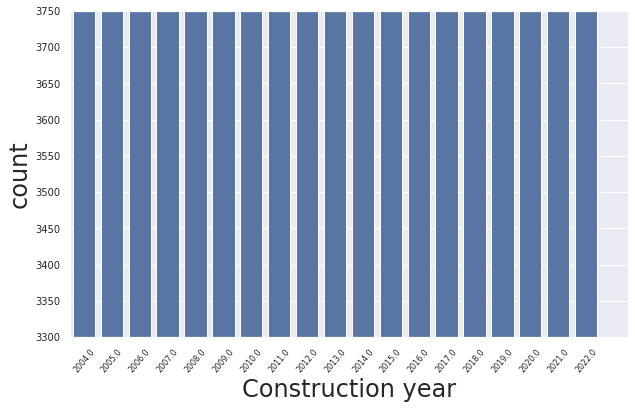

In [113]:
plt.figure(figsize=(10,6))
sb.countplot(data=airbnb_df,x='Construction year', color=sb.color_palette()[0])
plt.xticks(rotation=50)
plt.ylim(3300,3750)
plt.xlim(.5,20.5);

In [114]:
price_per_year = airbnb_df.groupby('Construction year')['price'].median()
fig = px.line(price_per_year,
            x=price_per_year.index,
            y=price_per_year.values,
            labels={'x': 'Construction year', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_year.values],
            title='Average price per construction year in USD',
            color_discrete_sequence=px.colors.sequential.Teal_r,
)


fig.show()

In [115]:
from scipy.stats import f_oneway


In [116]:
category_list = airbnb_df.groupby('Construction year')['price'].apply(list)
Annova_result = f_oneway(*category_list)
print('P-value for Annova is : ',Annova_result[0])

P-value for Annova is :  1.7581606082081835


In [117]:
feature = 'host_identity_verified'
airbnb_df['host_identity_verified'].value_counts()


unconfirmed    51468
verified       51083
Name: host_identity_verified, dtype: int64

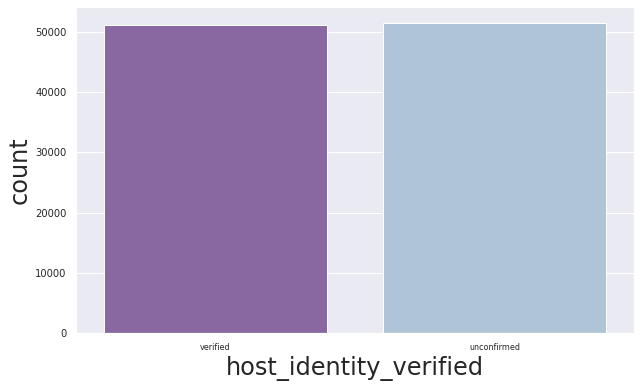

In [118]:
plt.figure(figsize=(10,6))
plt.xlabel("feature: {}".format(feature))
sns.countplot(data=airbnb_df, x='host_identity_verified', palette='BuPu_r')
plt.show()

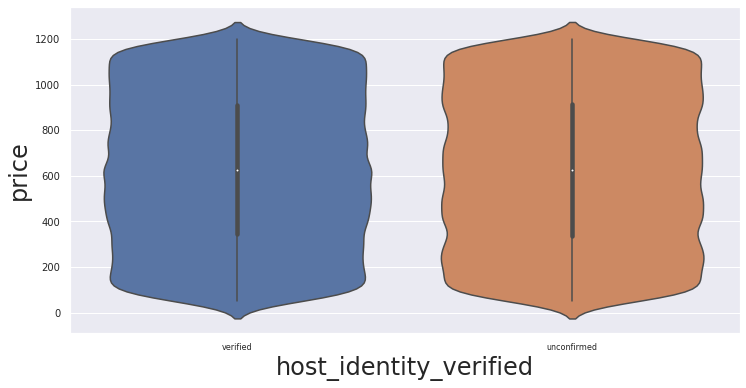

In [119]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(x="host_identity_verified", y="price", data=airbnb_df)

the same

In [120]:
review_rate_per_neighbourhood_group = airbnb_df.groupby('neighbourhood group')['review rate number'].mean()

# Let's plot them using plotly's barplot with value counts
fig = px.bar(review_rate_per_neighbourhood_group,
            x=review_rate_per_neighbourhood_group.index,
            y=review_rate_per_neighbourhood_group.values,
            labels={'x': 'Neighbourhood group', 'y': 'Average review rate'},
            text=[str(round(i, 2)) for i in review_rate_per_neighbourhood_group.values],
            title='Average review rate per neighbourhood group',
            color_discrete_sequence=px.colors.sequential.algae,
)


fig.show()

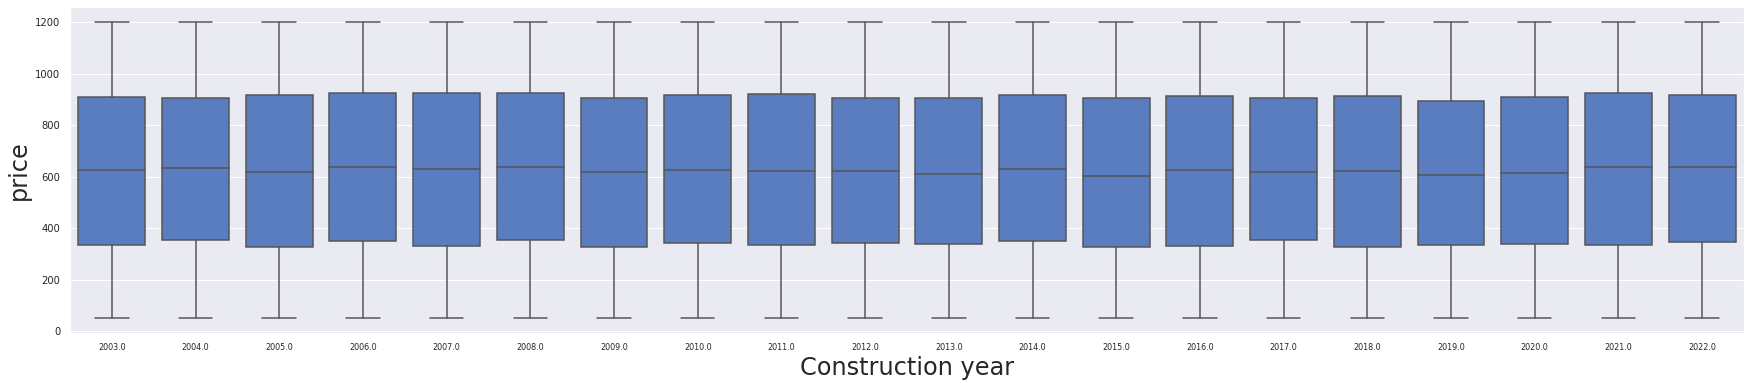

In [121]:
plt.figure(figsize=(30,6))
sb.boxplot(data=airbnb_df,x='Construction year',y='price', color=def_color)

##6) Minimum night & price

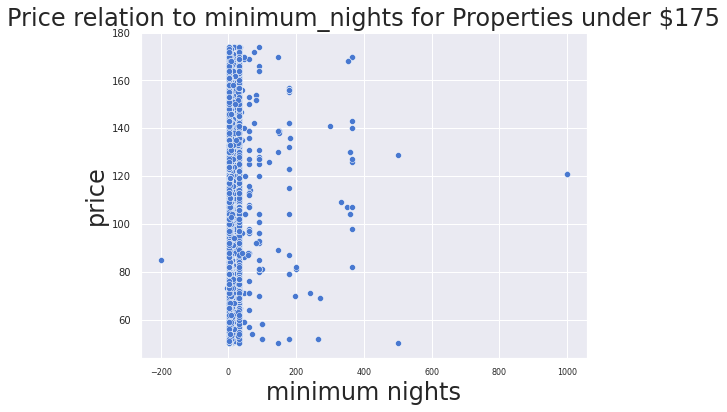

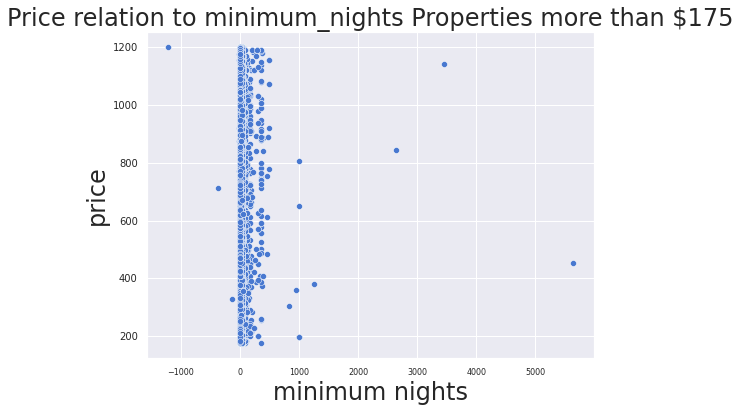

In [122]:
sns.set_palette("muted")
x = 'minimum nights'
y = 'price'

title = 'Price relation to minimum_nights for Properties under $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to minimum_nights Properties more than $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()


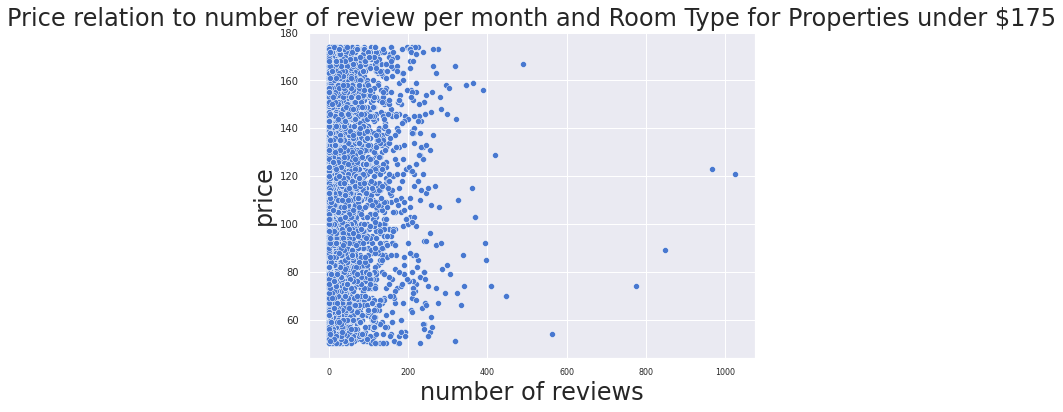

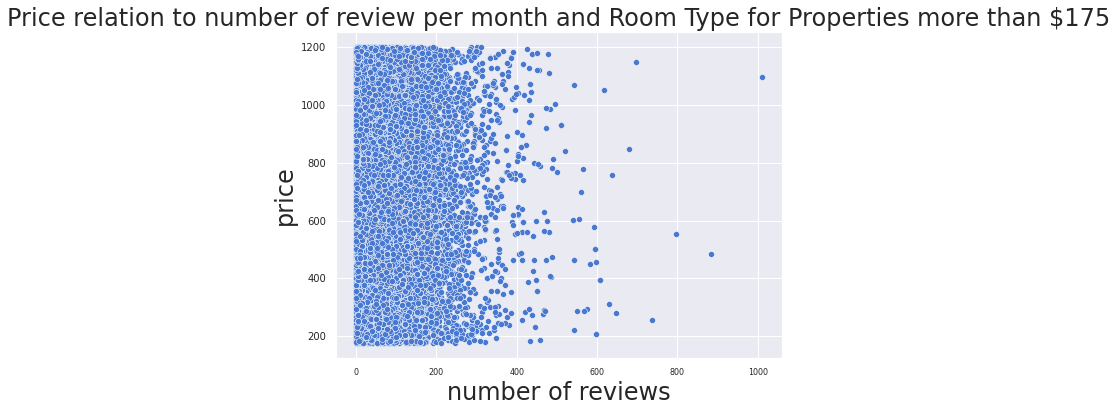

In [123]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'number of reviews'
y = 'price'

title = 'Price relation to number of review per month and Room Type for Properties under $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month and Room Type for Properties more than $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()


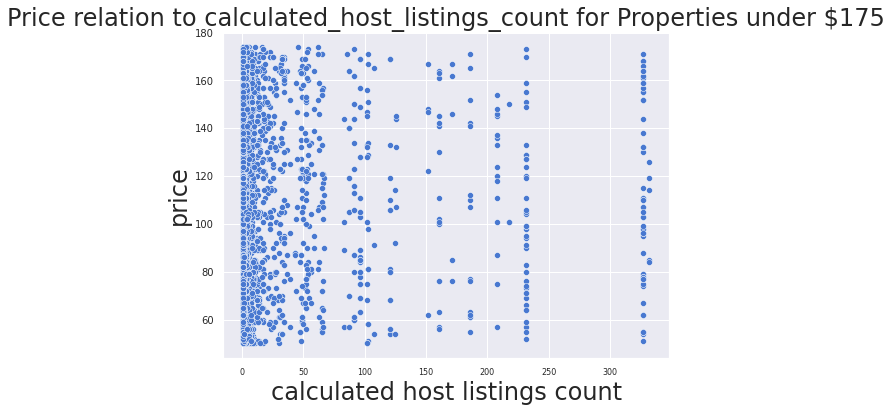

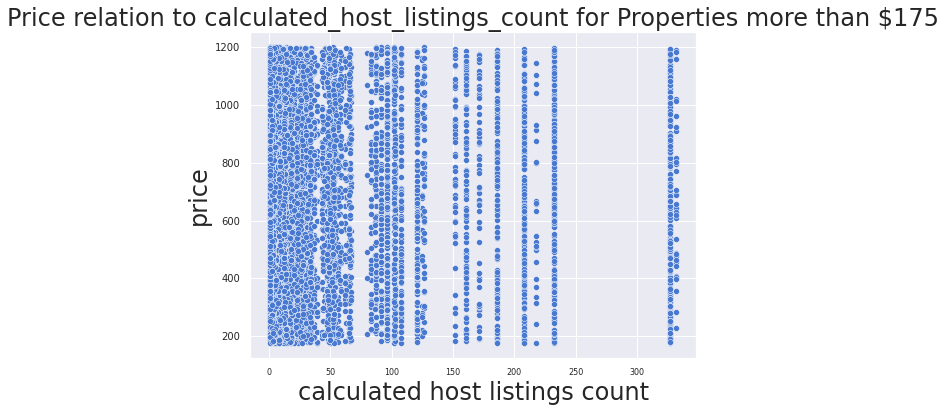

In [124]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'calculated host listings count'
y = 'price'

title = 'Price relation to calculated_host_listings_count for Properties under $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to calculated_host_listings_count for Properties more than $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()


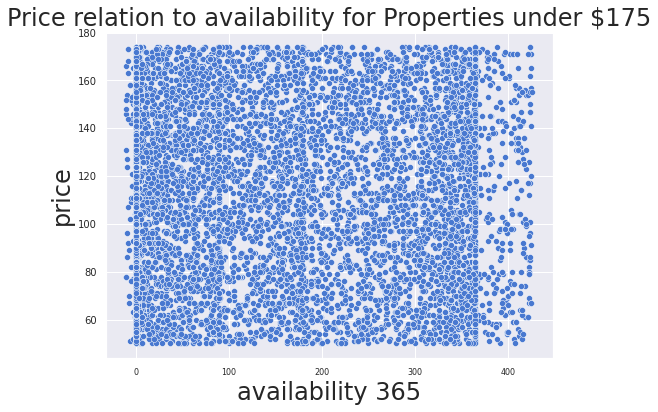

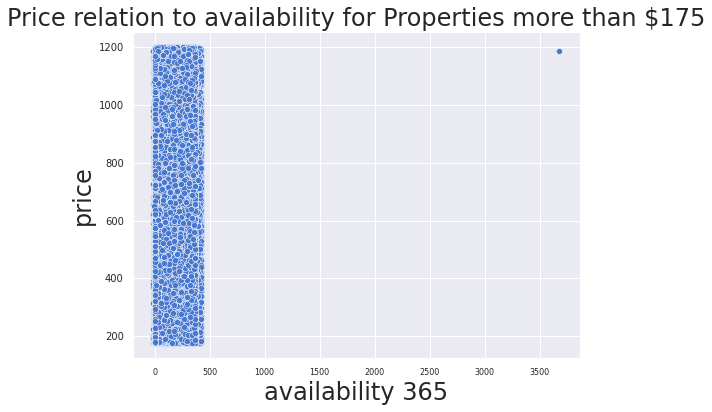

In [125]:
sns.set_palette("muted")
x = 'availability 365'
y = 'price'

title = 'Price relation to availability for Properties under $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to availability for Properties more than $175'
data_filtered = airbnb_df.loc[airbnb_df['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()


###Relationship between price and service fee



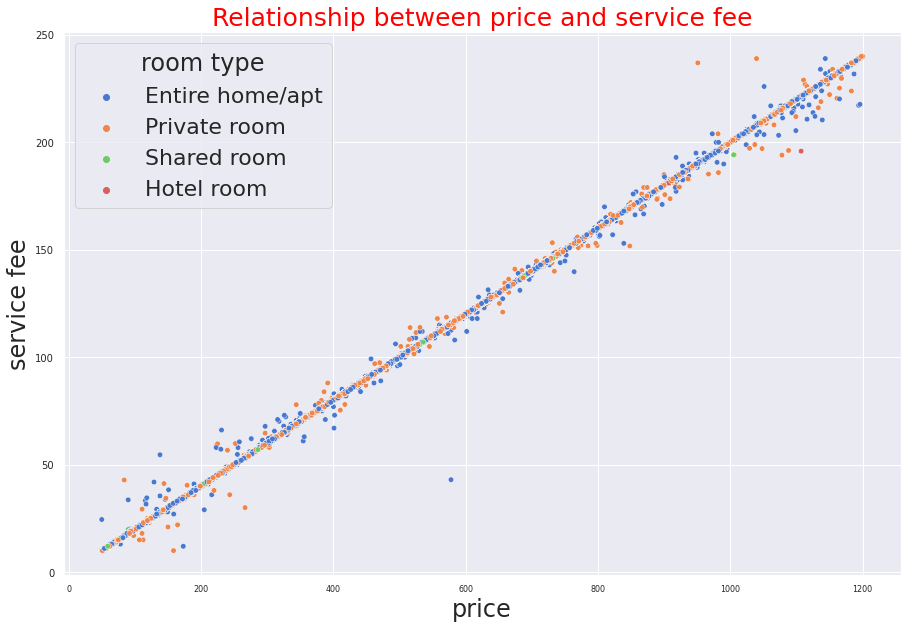

In [126]:
plt.figure(figsize=(15,10))
plt.title("Relationship between price and service fee", size=25, color="red")
sns.scatterplot(x=airbnb_df.price, y=airbnb_df['service fee'], hue=airbnb_df['room type'], s=30);

# Multivariate Exploration

### 1.) Neighborhood, Price, and Construction Year

In [127]:
df_10yrs = airbnb_df[(airbnb_df.loc[:,'Construction year'] >2014)
             & (airbnb_df.loc[:,'Construction year'] <= 2022)]

<Figure size 80x80 with 0 Axes>

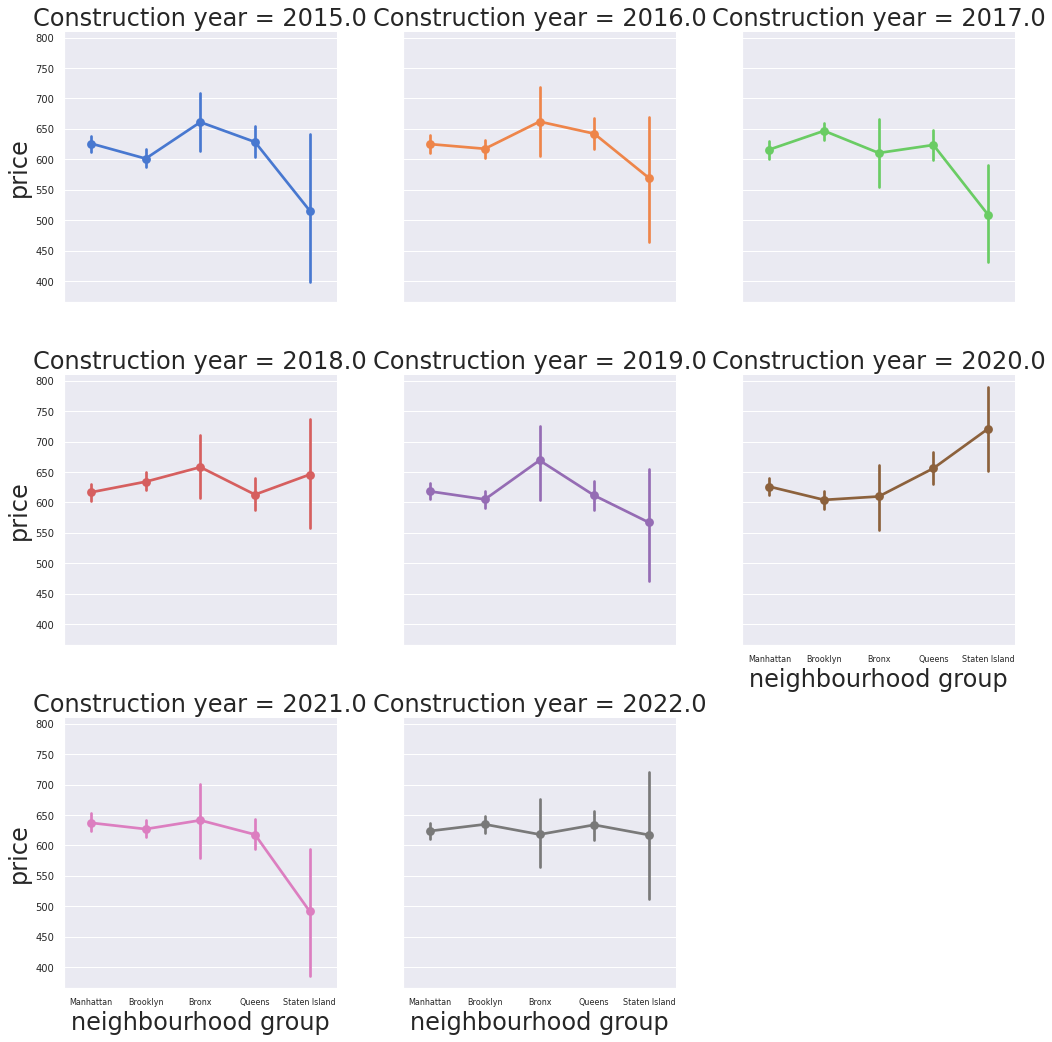

In [128]:
plt.figure(figsize=(1,1), dpi=80)
sb.catplot(x='neighbourhood group',y='price',data=df_10yrs,hue='Construction year',kind='point',
          col='Construction year', col_wrap=3)
plt.rcParams['font.size'] = 12
plt.rc('font', size=12)
plt.rc('xtick', labelsize=12)


### 3.) Price, Room Type, and Neighborhood 

<Figure size 1008x1008 with 0 Axes>

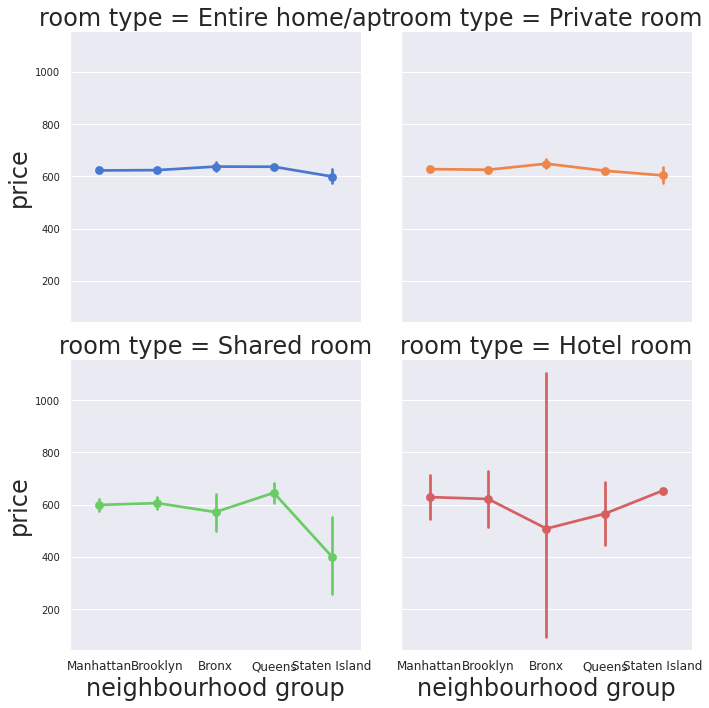

In [129]:
plt.figure(figsize=(14,14))
sb.catplot(x='neighbourhood group',y='price',data=airbnb_df,hue='room type',kind='point',
          col='room type', col_wrap=2)
plt.rc('xtick', labelsize=12)
